In [ ]:
import escape as esc
import numpy as np
import matplotlib.pyplot as plt
from escape.utils.widgets import show
esc.require("0.9.7")

In [ ]:
q = esc.var("Q")

# SAXS. Form-factors. PolyCoreShell

Original: https://www.ncnr.nist.gov/resources/sansmodels/PolyCoreShell.html

Author: Denis Korolkov

Calculates the form factor for polydispersed spherical particles with a core-shell structure. The spherical particles have a polydisperse core with a constant shell thickness. The form factor is normalized by the average particle volume


## Parameters

Parameter|	Variable| Value
---------|----------|--------
0|	Scale|	1.0
1|	Core Radius (Å)|	60.0
2|	Shell Thickness (Å)|	10.0
3|  Core Polydispersity (0-1)|	0.2
4|	Core SLD ($Å^{-2}$)|	1.0e-6
5|	Shell SLD ($Å^{-2}$)|	2.0e-6
6|	Solvent SLD ($Å^{-2}$)|	3.0e-6
7|	incoherent Background(cm^{-1})|	0.000


## Usage notes

Parameter[0] (scale) is correlated with the SLD's that describe the particle. No more than one of these parameters can be free during model fitting.

Parameter[3] (polydispersity) is constrained to keep it within its physical limits of (0,1). 

The returned form factor is normalized by the average particle volume $\left<V\right>$:

 

where 

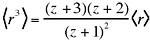

and $z$ is the width parameter of the Schulz distribution,




The average particle diameter is 2*(Radius + shell thickness)



## Reference

Bartlett, P.; Ottewill, R. H. J. Chem. Phys., 1992, 96, 3306.


In [ ]:
#Definition of parameters
I0 = esc.par("Scale", 1, scale=1e8, fixed=True)
Rc = esc.par("Average Core Radius", 60, units=esc.angstr)
P = esc.par("Polydispersity", 0.2, units="", userlim=[0, 1])
S = esc.par("Shell thickness", 10, units=esc.angstr)
rho_c = esc.par("Core SLD", 1, scale=1e-6, units=f"{esc.angstr}⁻²")
rho_s = esc.par("Shell SLD", 2, scale=1e-6, units=f"{esc.angstr}⁻²")
rho_solv = esc.par("Solvent SLD", 3, scale=1e-6, units=f"{esc.angstr}⁻²")
bkgr = esc.par("Background", 0.0, userlim=[0, 0.03])

#Model equations
X=esc.var("X")


#integration parameter or actual particle radius
r= esc.par("Core radius", 60)

#distribution function
G=esc.schulz("G", r, Rc, P)


rs = r+S

Vc = 4/3 * np.pi*r**3
Vs = 4/3 * np.pi*rs**3

QRc = q*r
QRs = q*rs

jc = (esc.sin(QRc)-QRc*esc.cos(QRc))/QRc**3
js = (esc.sin(QRs)-QRs*esc.cos(QRs))/QRs**3

z = 1/P**2-1
Va = 4*np.pi/3*(z+3)*(z+2)/(z+1)**2*Rc**3

F = (3*Vc*(rho_c-rho_s)*jc+3*Vs*(rho_s-rho_solv)*js)**2

std = Rc*P
#integral from 0 to 10*std
I = I0/Va*esc.average(F, G, r, Rc, 0, 10*std, maxiter=100, epsrel=1e-8, epsabs=1e-8)+bkgr


show(I, coordinates=np.linspace(0.001, 0.7, 256), figtitle="PolyCoreShell", 
     xlog=True, ylog=True, xlabel=f"Q [{esc.angstr}1⁻¹]", ylabel="P(q)[cm⁻¹]")

In [ ]:
#or using a special function to integrate with Schulz distribution
I = I0/Va*esc.average_schulz(F, P, r, Rc, maxiter=100, epsrel=1e-8, epsabs=1e-8, numstd=10)+bkgr
show(I, coordinates=np.linspace(0.001, 0.7, 256), figtitle="PolyCoreShell", 
     xlog=True, ylog=True, xlabel=f"Q [{angstroms_1}]", ylabel="P(q)[cm^-1]")